In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree as xgb_plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score


In [6]:
# ========================
# 1. Data loading
# ========================
data = np.loadtxt('activity_new_data.txt', delimiter=',')
X = data[:, 1:]
y = data[:, 0]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [7]:
# ========================
# 2. Model Definition
# ========================
modelET = ExtraTreesClassifier(n_estimators=100, max_depth=5, random_state=42)
modelRF = RandomForestClassifier(n_estimators=100, max_depth=10, oob_score=True, random_state=42)
modelGB = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=3, subsample=0.8, random_state=42)
modelXG = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, subsample=0.9,
                        colsample_bytree=0.8, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
modelGNB = GaussianNB()

models = [modelET, modelRF, modelGB, modelXG, modelGNB]

In [8]:
# ========================
# 3. Evaluation and Exporting results
# ========================
results = []

for model in models:
    print("=" * 50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)

    print(f"Model: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (macro): {prec:.4f}")
    print(f"Recall (macro): {rec:.4f}")

    results.append({
        'Model': model.__class__.__name__,
        'Accuracy': acc,
        'Precision_macro': prec,
        'Recall_macro': rec
    })

# Export results to CSV
df_results = pd.DataFrame(results)
df_results.to_csv('model_evaluation_results.csv', index=False)
print("\nResultados guardados en 'model_evaluation_results.csv'.")


Model: ExtraTreesClassifier
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        24
         1.0       1.00      0.96      0.98        24
         2.0       1.00      1.00      1.00        24
         3.0       1.00      0.92      0.96        24
         4.0       1.00      1.00      1.00        24
         5.0       0.92      1.00      0.96        24

    accuracy                           0.97       144
   macro avg       0.97      0.97      0.97       144
weighted avg       0.97      0.97      0.97       144

Accuracy: 0.9653
Precision (macro): 0.9672
Recall (macro): 0.9653
Model: RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        24
         1.0       1.00      0.92      0.96        24
         2.0       0.96      1.00      0.98        24
         3.0       1.00      0.92      0.96        24
         4.0       0.96      1.00      0.98        24
        

/Users/diegovertiz/Documents/AACuarto Semestre/Modelación Inteligencia Artificial/ia_modelling/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:26:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBClassifier
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        24
         1.0       0.88      0.96      0.92        24
         2.0       1.00      1.00      1.00        24
         3.0       1.00      0.92      0.96        24
         4.0       0.96      1.00      0.98        24
         5.0       0.96      1.00      0.98        24

    accuracy                           0.97       144
   macro avg       0.97      0.97      0.97       144
weighted avg       0.97      0.97      0.97       144

Accuracy: 0.9653
Precision (macro): 0.9674
Recall (macro): 0.9653
Model: GaussianNB
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        24
         1.0       1.00      0.96      0.98        24
         2.0       0.96      1.00      0.98        24
         3.0       0.95      0.88      0.91        24
         4.0       1.00      1.00      1.00        24
         5.0       0.86    

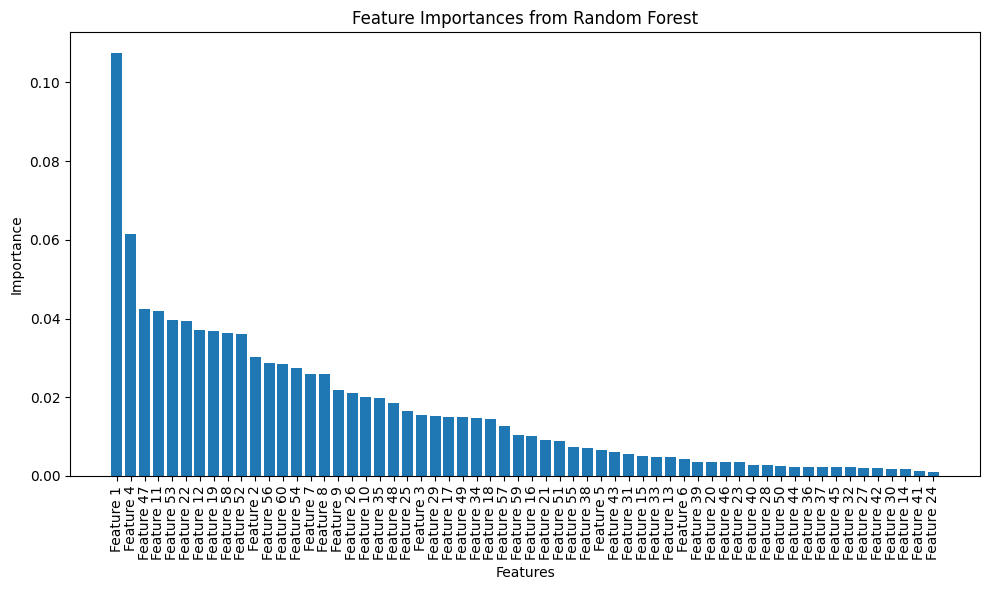

In [9]:
# ========================
# 4.  Visualization of Feature Importances
# ========================
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]
class_labels = [f'Class {int(i)}' for i in np.unique(y)]

# Random Forest
plt.figure(figsize=(10, 6))
feature_importances = modelRF.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

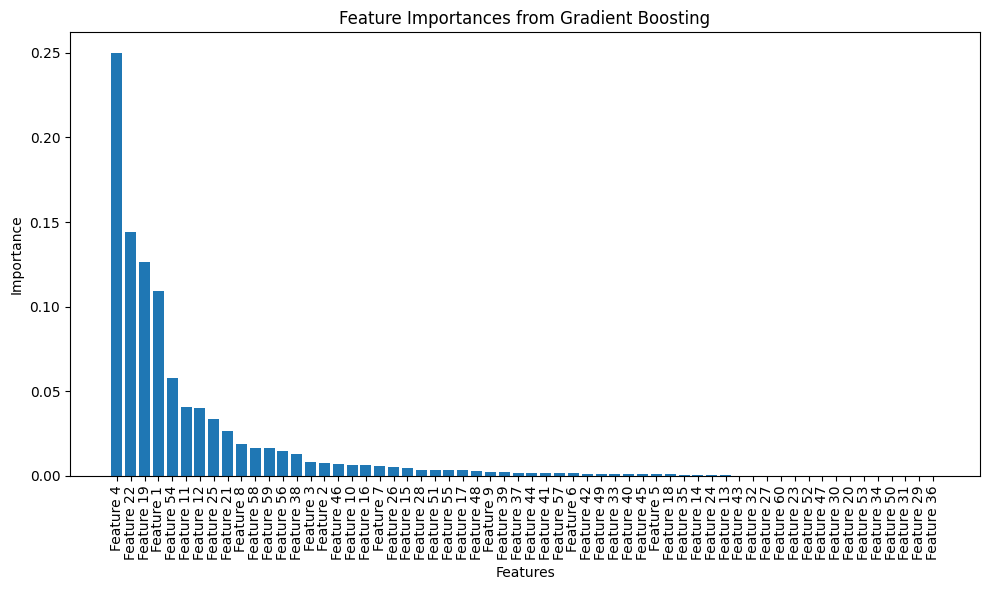

In [10]:
# Gradient Boosting
plt.figure(figsize=(10, 6))
feature_importances_gb = modelGB.feature_importances_
indices_gb = np.argsort(feature_importances_gb)[::-1]
plt.bar(range(X.shape[1]), feature_importances_gb[indices_gb], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices_gb], rotation=90)
plt.title('Feature Importances from Gradient Boosting')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

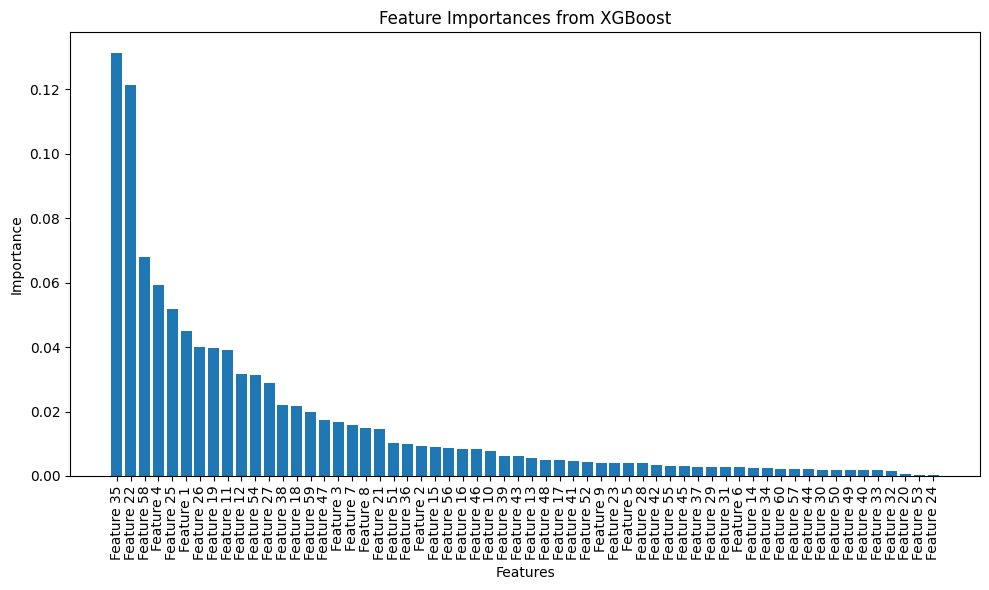

In [11]:
# XGBoost
plt.figure(figsize=(10, 6))
feature_importances_xg = modelXG.feature_importances_
indices_xg = np.argsort(feature_importances_xg)[::-1]
plt.bar(range(X.shape[1]), feature_importances_xg[indices_xg], align='center')
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices_xg], rotation=90)
plt.title('Feature Importances from XGBoost')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

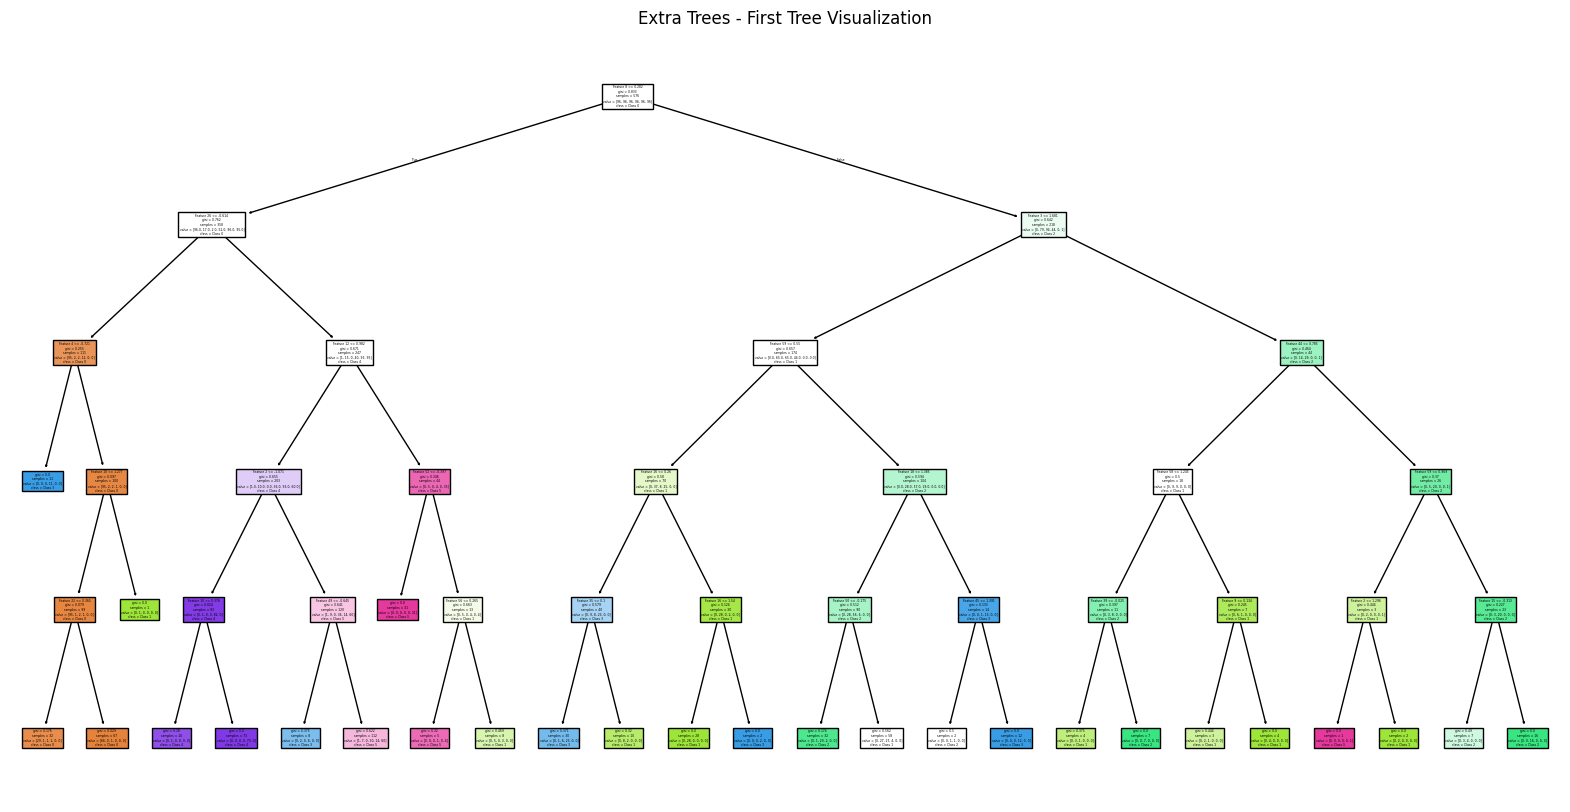

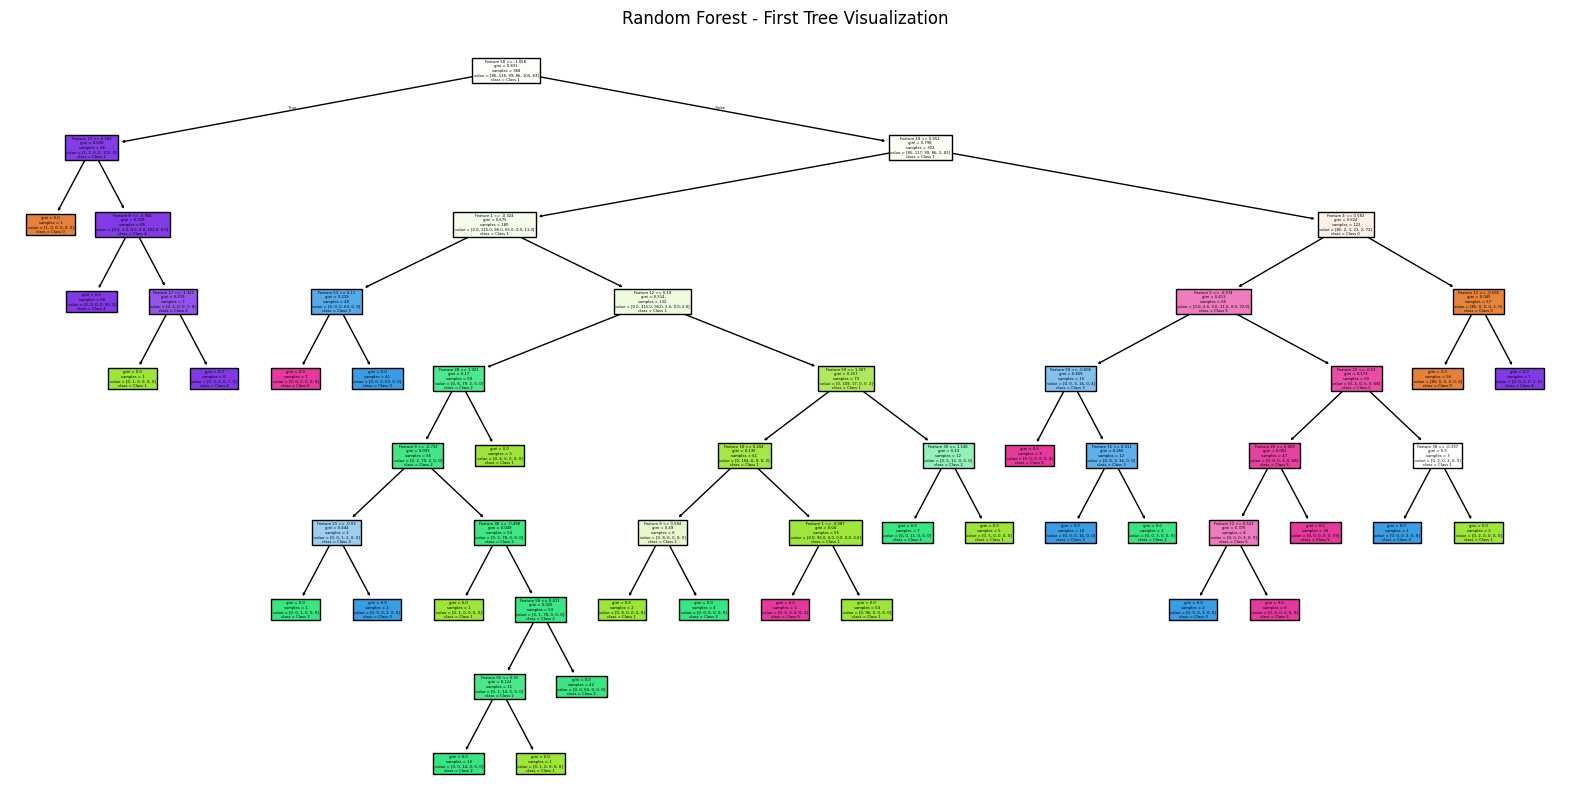

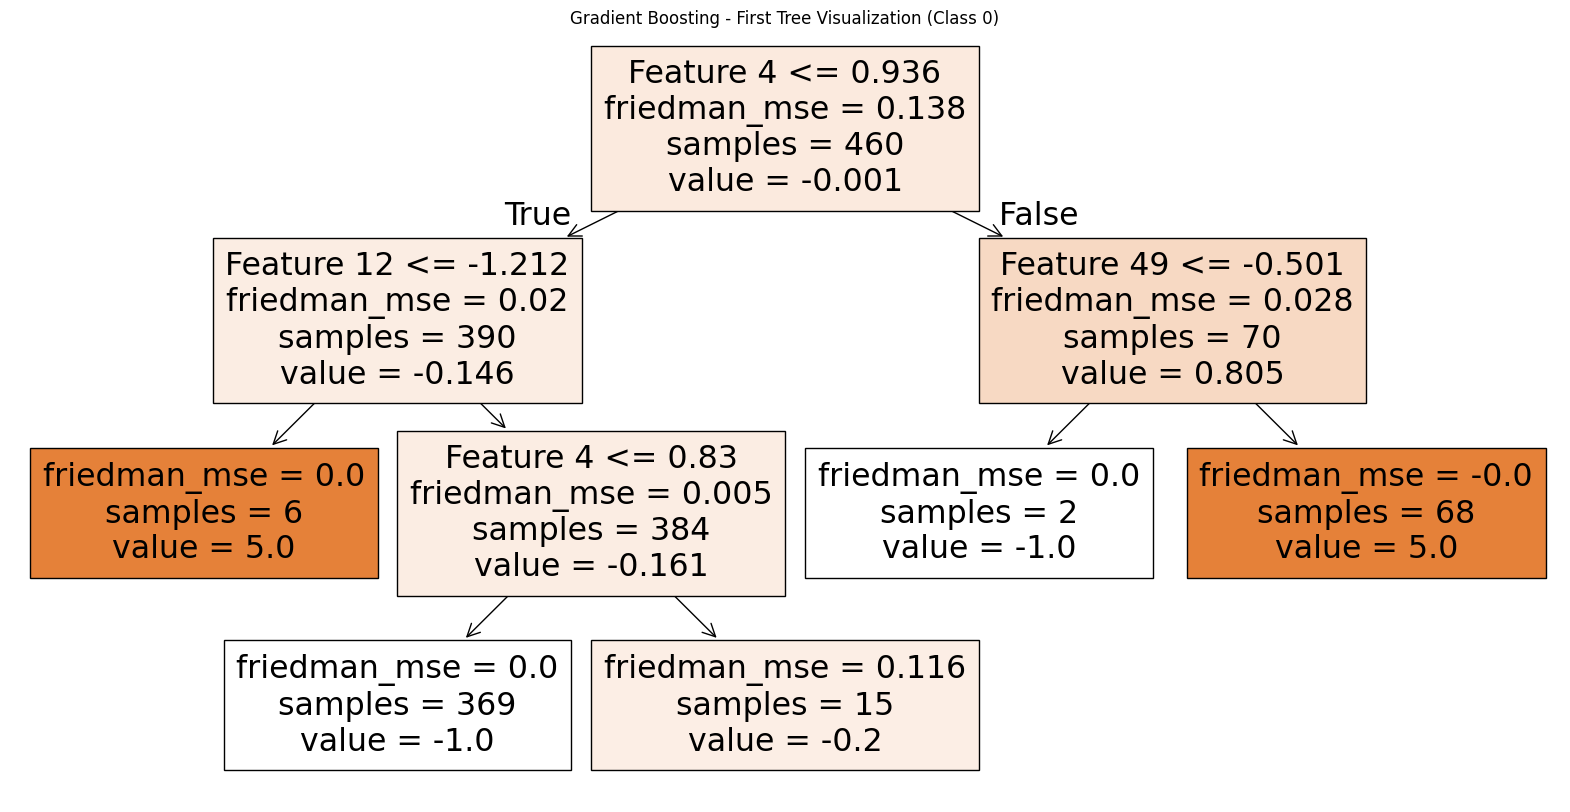

/Users/diegovertiz/Documents/AACuarto Semestre/Modelación Inteligencia Artificial/ia_modelling/lib/python3.12/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

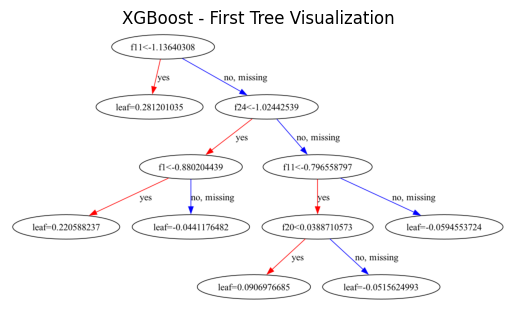

In [12]:
# ========================
# 5. Visualization of trees
# ========================
plt.figure(figsize=(20, 10))
plot_tree(modelET.estimators_[0], filled=True,
          feature_names=feature_names, class_names=class_labels)
plt.title('Extra Trees - First Tree Visualization')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(modelRF.estimators_[0], filled=True, feature_names=feature_names, class_names=class_labels)
plt.title('Random Forest - First Tree Visualization')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(modelGB.estimators_[0, 0], filled=True, feature_names=feature_names, class_names=class_labels)
plt.title('Gradient Boosting - First Tree Visualization (Class 0)')
plt.show()

plt.figure(figsize=(20, 10))
xgb_plot_tree(modelXG, num_trees=0)
plt.title('XGBoost - First Tree Visualization')
plt.show()

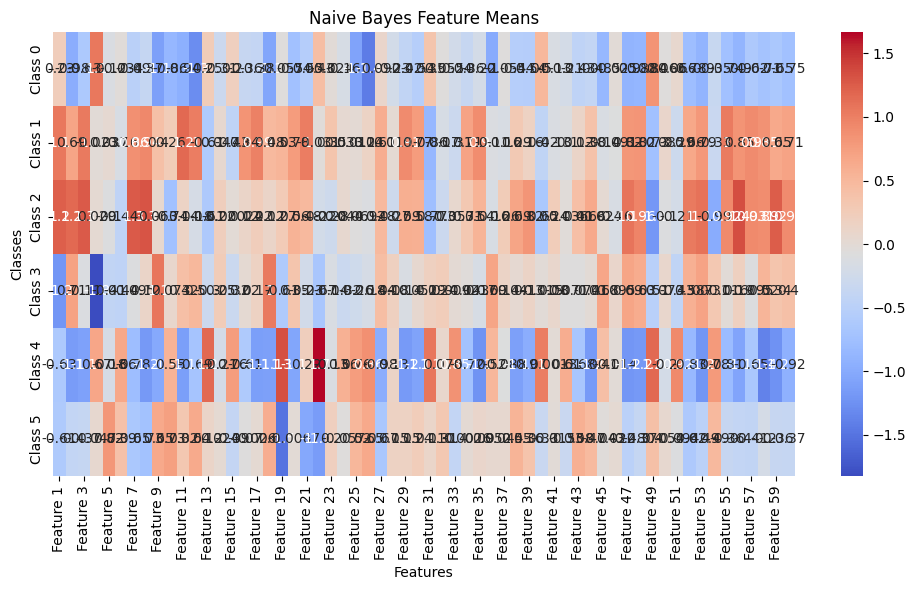

In [13]:
# ========================
# 6. Naive-Bayes Visuzaliation
# ========================
plt.figure(figsize=(10, 6))
sns.heatmap(
    pd.DataFrame(modelGNB.theta_, index=class_labels, columns=feature_names),
    annot=True,
    cmap='coolwarm'
)
plt.title('Naive Bayes Feature Means')
plt.xlabel('Features')
plt.ylabel('Classes')
plt.tight_layout()
plt.show()